# Identify calibration targets

Attempt to automatically locate the calibration target in each scene. If this fails for any images then the target can be located manually. Note that the automated method only works for scenes containing a single target!

Calibration spectra ( measured radiance vs known reflectance ) are then extracted from the targets and stored in the image .hdr files. 

In [1]:
import os
import glob
import numpy as np
from tqdm.auto import tqdm

import hylite
import hylite.io as io
from hylite.correct import Panel 

## Define data directories

In [3]:
# input directory containing images to locate (these should all be captured from about the same location)
path = '/Users/thiele67/Documents/Data/SPAIN/2020_Sierra_Bullones/20200309_sun/elc'
image_paths = glob.glob( os.path.join(path,"*.hdr"), recursive=True )

In [4]:
print("Found %d images:" % len(image_paths))
for p in image_paths:
    print(p)

Found 4 images:
/Users/thiele67/Documents/Data/SPAIN/2020_Sierra_Bullones/20200309_sun/elc/0066ELC.hdr
/Users/thiele67/Documents/Data/SPAIN/2020_Sierra_Bullones/20200309_sun/elc/0068ELC.hdr
/Users/thiele67/Documents/Data/SPAIN/2020_Sierra_Bullones/20200309_sun/elc/0067ELC.hdr
/Users/thiele67/Documents/Data/SPAIN/2020_Sierra_Bullones/20200309_sun/elc/0065ELC.hdr


## Define calibration panel material

In [5]:
from hylite.reference.spectra import R90, R50, PVC_Red, PVC_White, PVC_Grey # load calibration material spectra
M = R90 # define calibration panel material

## Attempt to automatically identify targets

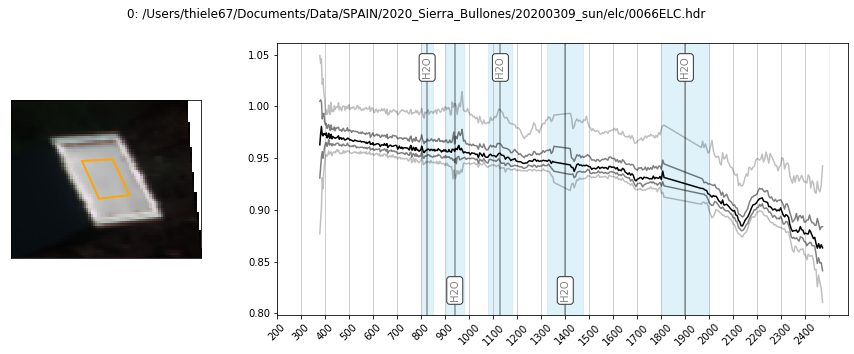

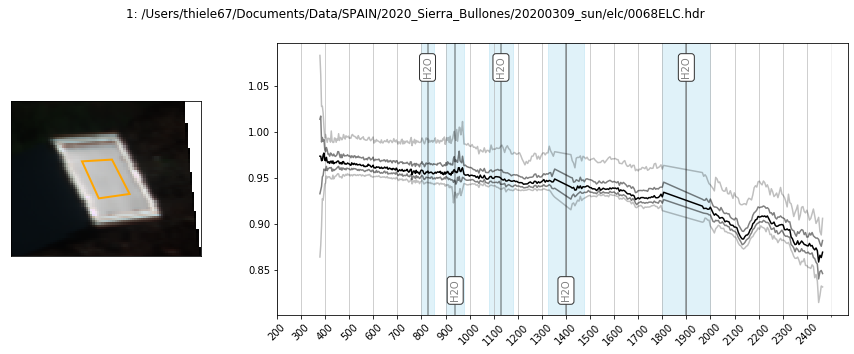

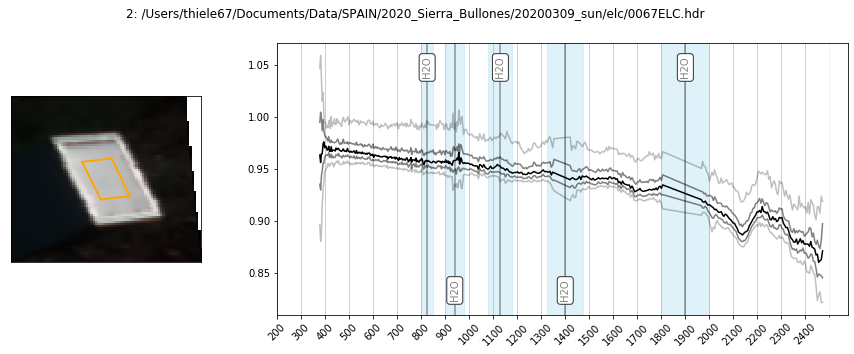

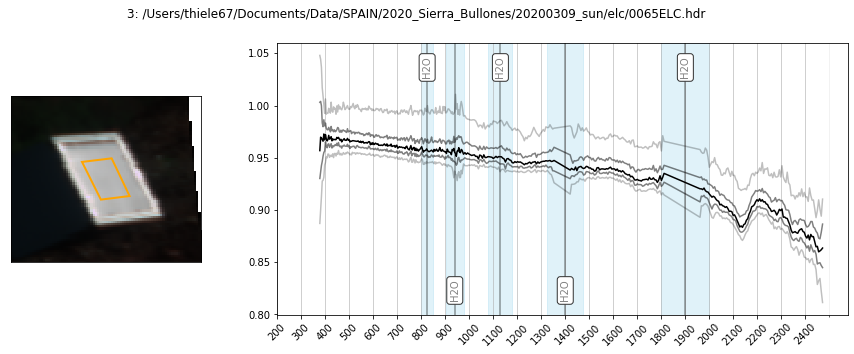

In [6]:
for i,p in enumerate(tqdm(image_paths)):
    
    image = io.loadWithGDAL( p ) #load image
    image.set_as_nan(0) # set nans 
    
    target = Panel(M,image,method='auto', bands=hylite.RGB) # look for panel

    #plot target
    fig,ax = target.quick_plot()
    fig.suptitle("%d: %s" % (i,p))
    fig.show()

    #add to header
    image.header.add_panel(target)

    #save
    outpath = io.matchHeader(p)[0]
    io.saveHeader(outpath, image.header)

## If necessary, manually pick some targets

In [ ]:
assert False, "Pause here and turn your brain on! ツ"

In [ ]:
incorrect = [0,1,2,3] # choose incorrectly identified targets to manually select

First, clear incorrectly set targets from header file.

In [ ]:
for i in incorrect:
    image = io.loadWithGDAL( image_paths[i] )
    image.header.remove_panel(None) # remove panels
    outpath = io.matchHeader(image_paths[i])[0]
    io.saveHeader(outpath, image.header)

If targets do exist in scene, manually select them. Skip this step if no targets exist.

In [ ]:
targets = []
for i in incorrect:
    
    image = io.loadWithGDAL( image_paths[i] ) #load image
    target = Panel(M,image,method='manual',bands=hylite.RGB) # select panel
    
    #add to header
    image.header.add_panel(target)

    #save
    outpath = io.matchHeader(image_paths[i])[0]
    io.saveHeader(outpath, image.header)
    
    targets.append(target) # store for plotting

In [ ]:
#plot targets
%matplotlib inline
for i,t in enumerate(targets):
    #plot target
    fig,ax = t.quick_plot()
    fig.suptitle("%d: %s" % (incorrect[i],image_paths[incorrect[i]]))
    fig.show()